,Country Name,Year,Value
9,Argentina,1960,23.479234
13,Australia,1960,31.522327
18,Benin,1960,11.424972
19,Burkina Faso,1960,8.519939
20,Bangladesh,1960,6.894266


2000 count: 200
2020 count: 216

Descriptive Statistics 2000
count    200.000000
mean      22.209006
std        6.462466
min        0.000000
25%       19.120003
50%       22.571459
75%       25.508560
max       54.042047
Name: Value, dtype: float64

Descriptive Statistics 2020
count    216.000000
mean      23.890512
std        7.886018
min       -0.248728
25%       18.956153
50%       22.948858
75%       28.561543
max       47.920934
Name: Value, dtype: float64


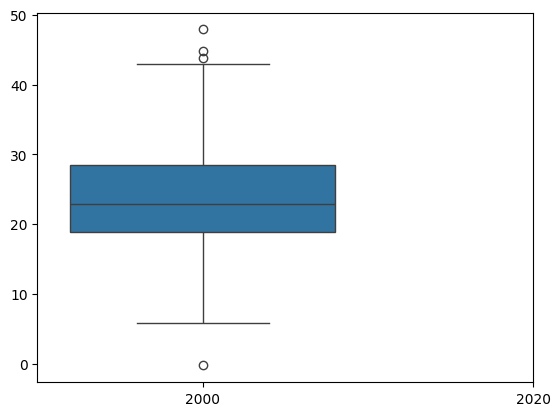


T-statistic: -2.367815080825951
P-value: 0.01835222867466251


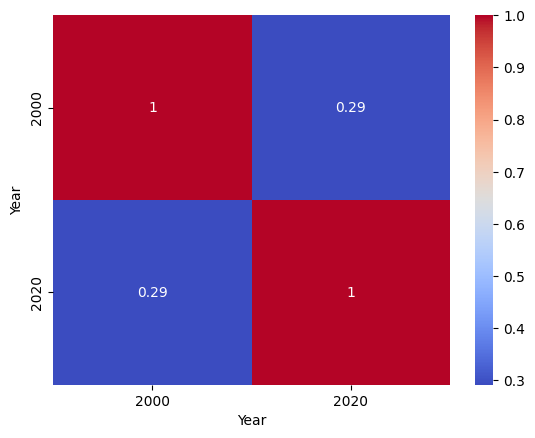

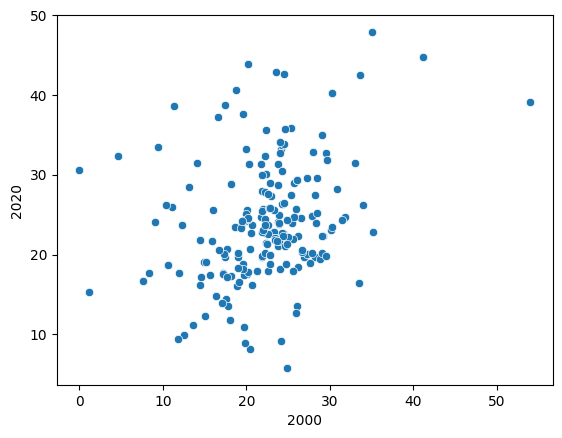

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = "/content/API_NE.GDI.TOTL.ZS_DS2_en_csv_v2_2220.csv"
df = pd.read_csv(file_path, skiprows=4)

df = df[["Country Name"] + [col for col in df.columns if col.isdigit()]]

df = df.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

df = df.dropna()

display(df.head())

year_2000 = df[df["Year"] == 2000]["Value"]
year_2020 = df[df["Year"] == 2020]["Value"]

print("2000 count:", len(year_2000))
print("2020 count:", len(year_2020))

print("\nDescriptive Statistics 2000")
print(year_2000.describe())

print("\nDescriptive Statistics 2020")
print(year_2020.describe())

plt.figure()
sns.boxplot(data=[year_2000, year_2020])
plt.xticks([0,1], ["2000", "2020"])
plt.show()

t_stat, p_value = stats.ttest_ind(year_2000, year_2020)

print("\nT-statistic:", t_stat)
print("P-value:", p_value)

pivot_df = df.pivot(index="Country Name", columns="Year", values="Value")

pivot_df = pivot_df[[2000, 2020]].dropna()

corr = pivot_df.corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

plt.figure()
sns.scatterplot(x=pivot_df[2000], y=pivot_df[2020])
plt.xlabel("2000")
plt.ylabel("2020")
plt.show()
